In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
import scipy.optimize as opt
from sklearn.metrics import log_loss
from collections import Counter
from sklearn import svm
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
print('OK')

OK


In [2]:
url="https://raw.githubusercontent.com/santiago1995c/Final_Capstone_Project/main/US_Accidents_June20%20-%20Copy.csv"
df = pd.read_csv(url)
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-194257,MapQuest,241,3,11/30/2016 16:25,11/30/2016 17:10,41.139324,-74.169876,0.01,Right lane blocked due to accident on I-87 Sou...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-194258,MapQuest,201,3,11/30/2016 15:40,11/30/2016 17:09,41.118748,-74.159744,2.53,Accident on I-87 Southbound between Exit 14B C...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-194259,MapQuest,201,3,11/30/2016 15:26,11/30/2016 16:56,41.014034,-73.717239,1.17,Accident on I-287 Cross Westchester Expy Eastb...,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-194260,MapQuest,201,3,11/30/2016 16:14,11/30/2016 16:59,41.390369,-73.597969,0.01,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-194261,MapQuest,201,3,11/30/2016 16:17,11/30/2016 17:02,41.390369,-73.597969,0.01,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,ID,object
1,Source,object
2,TMC,int64
3,Severity,int64
4,Start_Time,object
5,End_Time,object
6,Start_Lat,float64
7,Start_Lng,float64
8,Distance(mi),float64
9,Description,object


In [4]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,13
1,int64,2
2,float64,9
3,object,17


In [4]:
df.drop(['TMC','Start_Lat','Start_Lng','Distance(mi)'],axis=1,inplace=True)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Description,Street,Side,City,County,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-194257,MapQuest,3,11/30/2016 16:25,11/30/2016 17:10,Right lane blocked due to accident on I-87 Sou...,Route 17,R,Sloatsburg,Rockland,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-194258,MapQuest,3,11/30/2016 15:40,11/30/2016 17:09,Accident on I-87 Southbound between Exit 14B C...,I-287 S,R,Suffern,Rockland,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-194259,MapQuest,3,11/30/2016 15:26,11/30/2016 16:56,Accident on I-287 Cross Westchester Expy Eastb...,Hutchinson River Pkwy S,R,White Plains,Westchester,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-194260,MapQuest,3,11/30/2016 16:14,11/30/2016 16:59,Right hand shoulder blocked due to accident on...,I-84 E,R,Brewster,Putnam,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-194261,MapQuest,3,11/30/2016 16:17,11/30/2016 17:02,Right hand shoulder blocked due to accident on...,I-84 E,R,Brewster,Putnam,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df[['Severity','Weather_Condition', 'Temperature(F)','Humidity(%)', 'Pressure(in)' ]]

,Severity,Weather_Condition,Temperature(F),Humidity(%),Pressure(in)
0,3,Overcast,53.1,93.0,29.81
1,3,Overcast,53.1,93.0,29.83
2,3,Light Rain,52.0,93.0,29.81
3,3,Rain,52.0,89.0,29.86
4,3,Rain,52.0,89.0,29.86
...,...,...,...,...,...
51158,2,Cloudy,69.0,87.0,29.77
51159,2,Cloudy,68.0,100.0,29.88
51160,2,Light Rain,67.0,93.0,29.43
51161,2,NaN,67.0,97.0,29.71


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,51163.0,2.396888,0.493988,1.0,2.00,2.00,3.0,4.00
Temperature(F),50810.0,53.805511,18.859686,-77.8,39.00,53.10,70.0,100.00
Humidity(%),50792.0,66.422822,19.764426,10.0,51.00,67.00,84.0,100.00
Pressure(in),50888.0,29.868007,0.366126,27.3,29.67,29.92,30.1,30.81
Visibility(mi),50527.0,8.981059,2.928256,0.0,10.00,10.00,10.0,105.00
Wind_Speed(mph),47378.0,9.127331,5.438136,0.0,5.80,8.10,12.0,126.60
Precipitation(in),28861.0,0.063645,0.728818,0.0,0.00,0.00,0.0,10.14


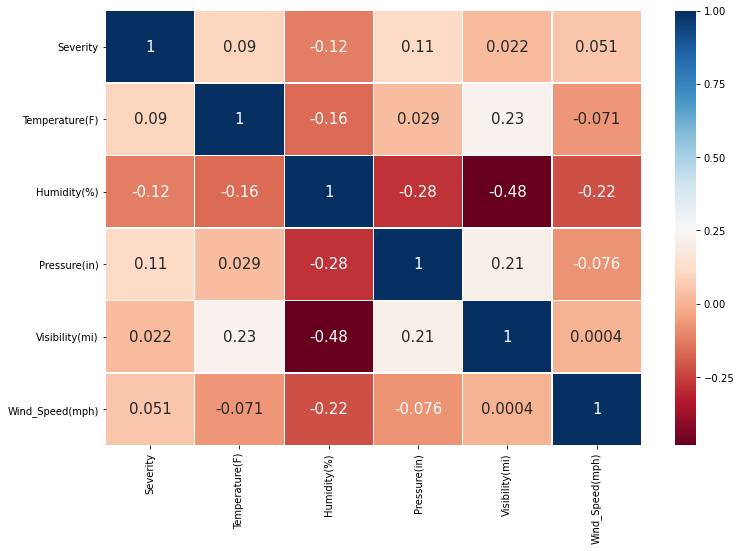

In [11]:
#Correlation analysis
fig=sns.heatmap(df[['Severity',
                    'Temperature(F)','Humidity(%)',
                    'Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),
                annot=True,cmap='RdBu',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [11]:
#Here is the distribution of the severity values.
print(df["Severity"].value_counts())

2    30946
3    20098
4      109
1       10
Name: Severity, dtype: int64


Text(0.5, 1.0, 'Types \nof Severity')

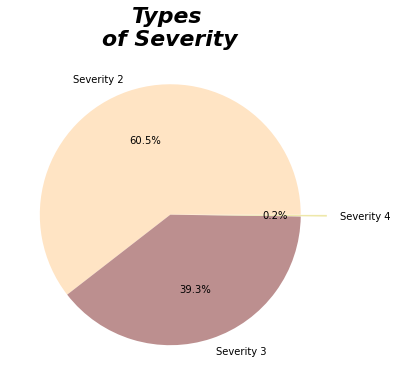

In [12]:
df_sev = df.groupby('Severity').size()
df_sev = df_sev[[2,3,4]]
cols = ['bisque', 'rosybrown', 'palegoldenrod']
cases = ['Severity 2','Severity 3','Severity 4']
plt.figure(figsize=(10,6))
plt.pie(df_sev,
        colors = cols,
        labels= cases,
        explode = (0,0,0.2), #moving slices apart
        autopct = ('%1.1f%%')) #to display %
plt.title('Types \nof Severity', weight='heavy', fontsize=22, style='italic')




In [13]:
df['time'] = pd.to_datetime(df['Start_Time'])
df.head()

,ID,Source,Severity,Start_Time,End_Time,Description,Street,Side,City,County,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,time
0,A-194257,MapQuest,3,11/30/2016 16:25,11/30/2016 17:10,Right lane blocked due to accident on I-87 Sou...,Route 17,R,Sloatsburg,Rockland,...,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 16:25:00
1,A-194258,MapQuest,3,11/30/2016 15:40,11/30/2016 17:09,Accident on I-87 Southbound between Exit 14B C...,I-287 S,R,Suffern,Rockland,...,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 15:40:00
2,A-194259,MapQuest,3,11/30/2016 15:26,11/30/2016 16:56,Accident on I-287 Cross Westchester Expy Eastb...,Hutchinson River Pkwy S,R,White Plains,Westchester,...,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 15:26:00
3,A-194260,MapQuest,3,11/30/2016 16:14,11/30/2016 16:59,Right hand shoulder blocked due to accident on...,I-84 E,R,Brewster,Putnam,...,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 16:14:00
4,A-194261,MapQuest,3,11/30/2016 16:17,11/30/2016 17:02,Right hand shoulder blocked due to accident on...,I-84 E,R,Brewster,Putnam,...,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 16:17:00


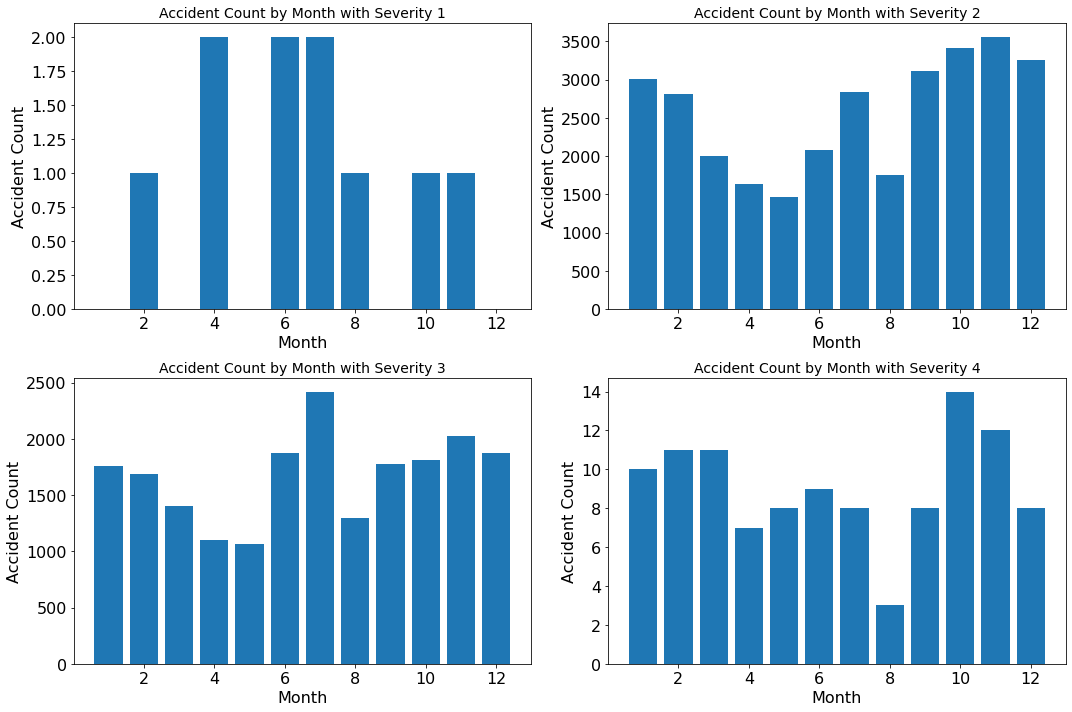

In [14]:
#lets see the severity by time 
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


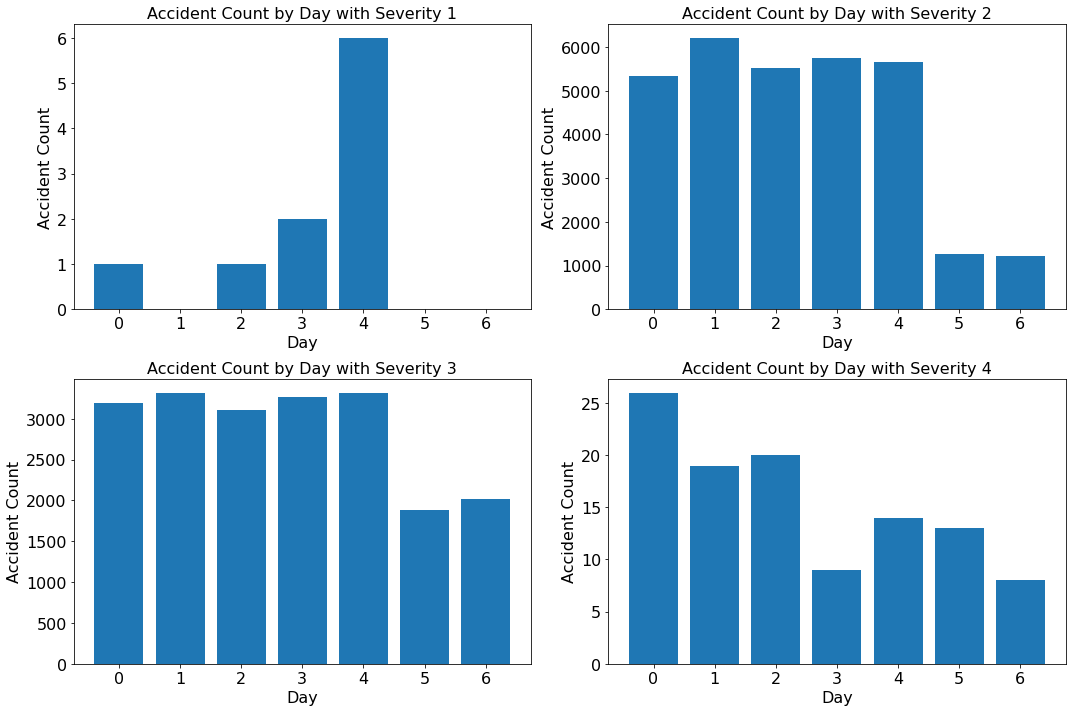

In [15]:
#lets see the severity by time (day)
df['DayOfWeek'] = df['time'].dt.dayofweek
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(df.loc[df["Severity"] == s]['DayOfWeek'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=16)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#There is a drop in the number of accidents for all severity levels during the weekend. 
#Although, the relative drop for level 3 and 4 is smaller.

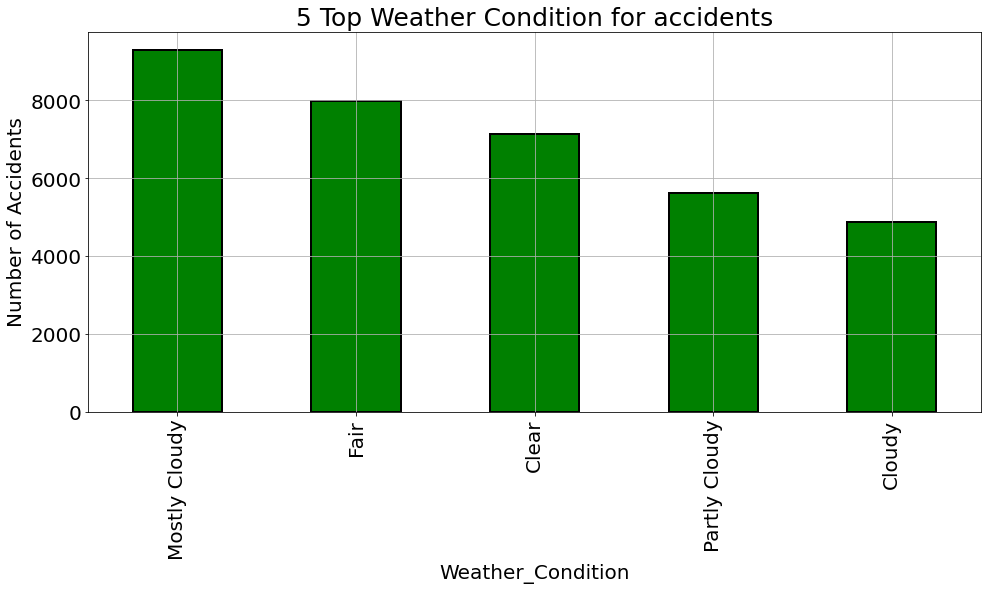

In [16]:
#lets see the top 5 weather conditions for accidents
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',color='g',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

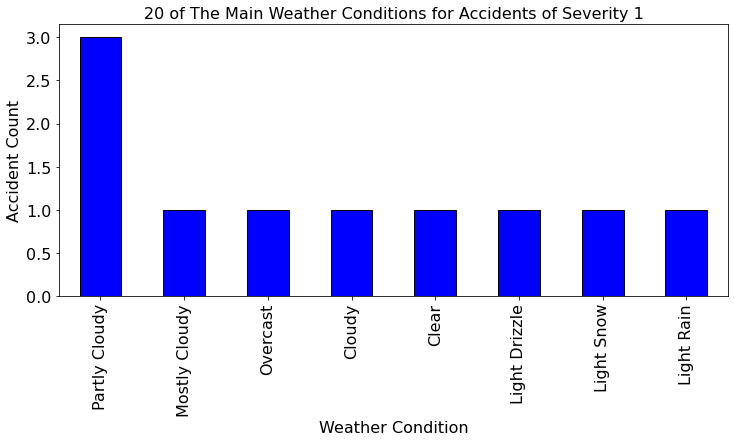

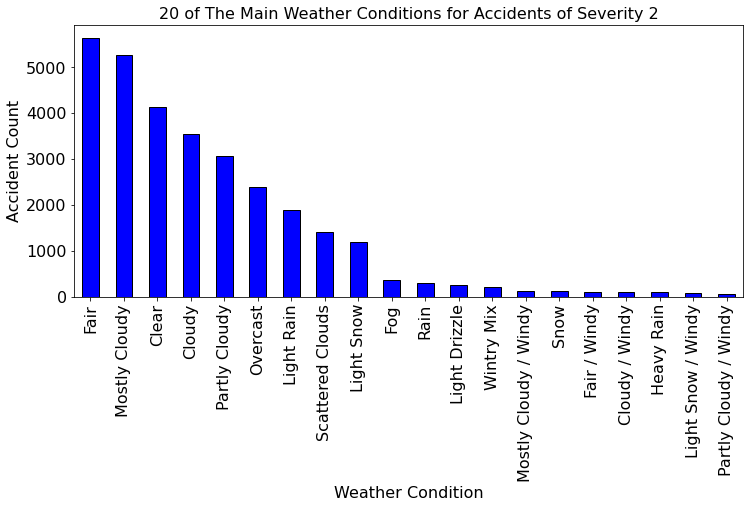

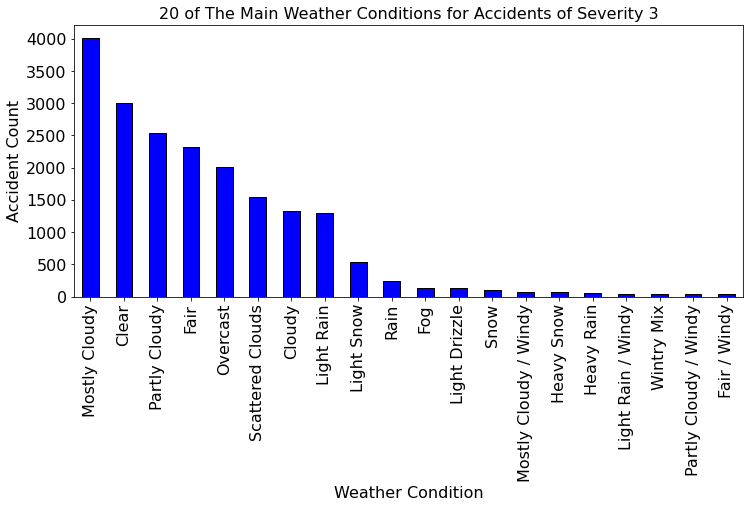

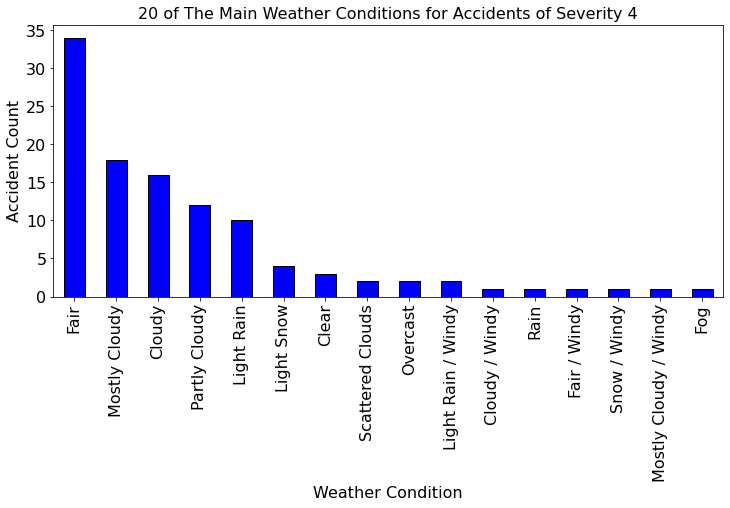

In [17]:
#analizyng weather conditions by severity

for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='b',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

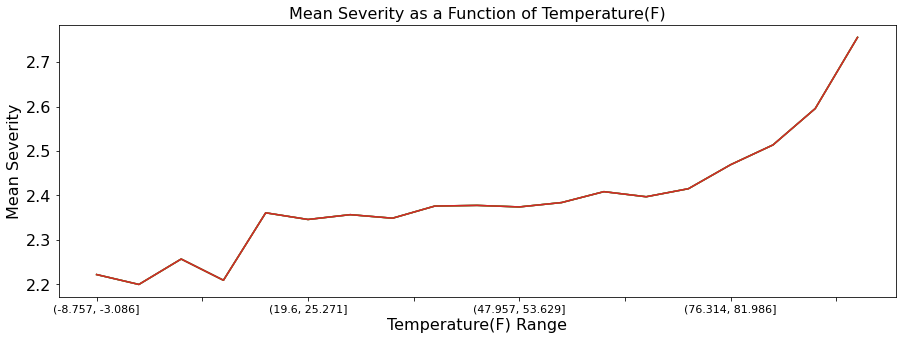

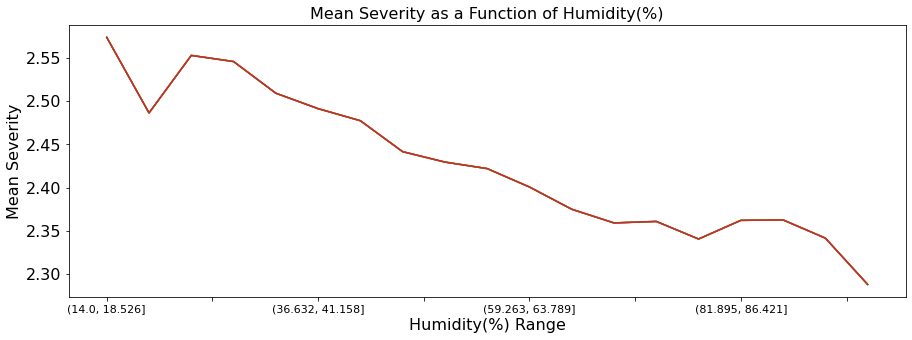

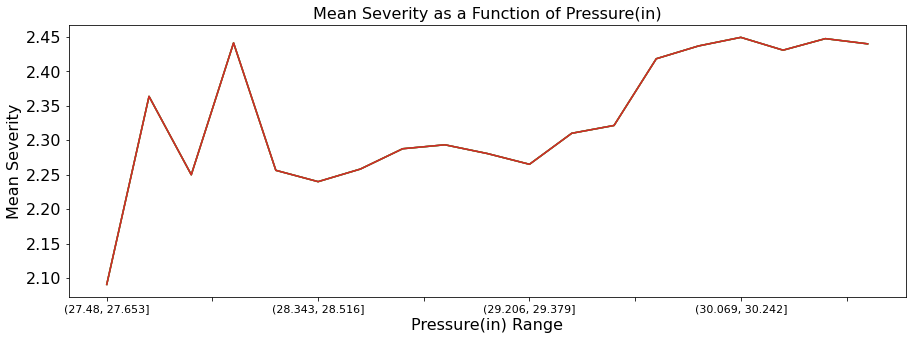

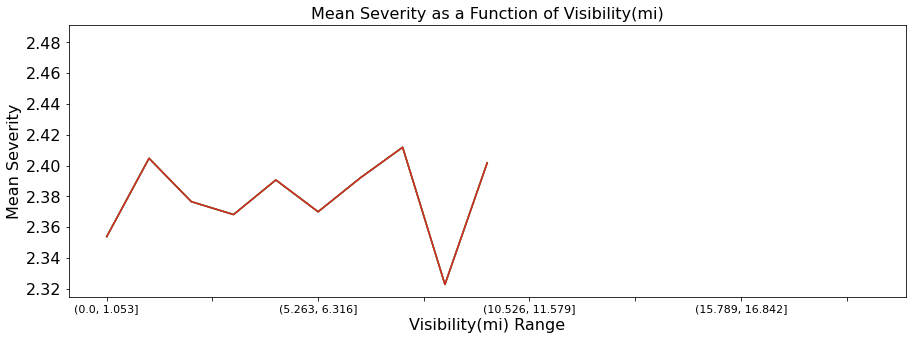

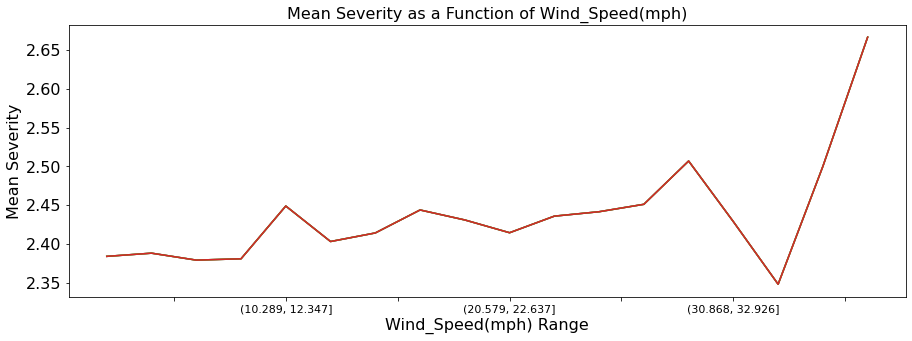

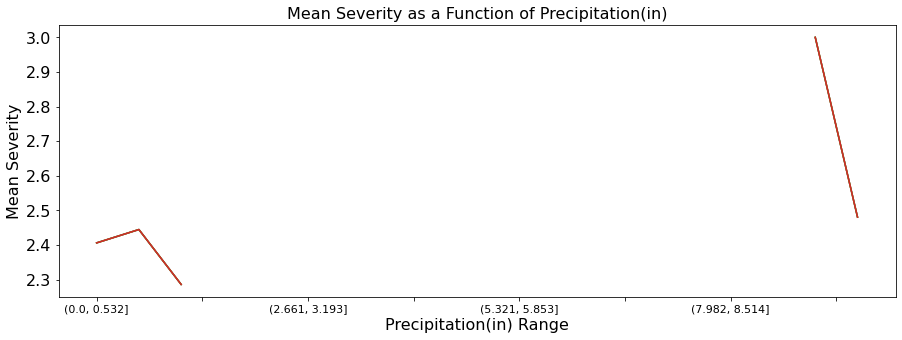

In [18]:
factors = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for factor in factors:
    # remove some of the extreme values
    factorMin = df[factor].quantile(q=0.0001)
    factorMax = df[factor].quantile(q=0.9999)
    # print df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).count()
    plt.subplots(figsize=(15,5))
    for s in np.arange(1,5):
        df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=16)

In [7]:
#clean the data
#Categorical data will be treated with Pandas get_dummies method. 
#Rows with missing values will be fill it with the mean.
median_T = df['Temperature(F)'].median()
median_H = df['Humidity(%)'].median()
median_P = df['Pressure(in)'].median()
# Fill NAN with median
df['Temperature(F)'].fillna(median_T, inplace=True)
df['Humidity(%)'].fillna(median_H, inplace=True)
df['Pressure(in)'].fillna(median_P, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,51163.0,2.396888,0.493988,1.0,2.00,2.00,3.0,4.00
Temperature(F),51163.0,53.800643,18.794601,-77.8,39.00,53.10,70.0,100.00
Humidity(%),51163.0,66.427008,19.692696,10.0,51.00,67.00,84.0,100.00
Pressure(in),51163.0,29.868286,0.365161,27.3,29.68,29.92,30.1,30.81
Visibility(mi),50527.0,8.981059,2.928256,0.0,10.00,10.00,10.0,105.00
Wind_Speed(mph),47378.0,9.127331,5.438136,0.0,5.80,8.10,12.0,126.60
Precipitation(in),28861.0,0.063645,0.728818,0.0,0.00,0.00,0.0,10.14


In [13]:
#we are going to set the dependent variable as 0"low_severity" and 1"high_severity"
df['Severity1'] = 'low_severity'
df.loc[df['Severity'] == 4, 'Severity1'] = 'high_severity'
df.loc[df['Severity'] == 3, 'Severity1'] = 'high_severity'
df.Severity1.value_counts()

low_severity     30956
high_severity    20207
Name: Severity1, dtype: int64

In [14]:
df1=df[(df.Weather_Condition=='Light Rain')|(df.Weather_Condition=='Partly Cloudy')|(df.Weather_Condition=='Clear')|(df.Weather_Condition=='Fair')|(df.Weather_Condition=='Mostly Cloudy')]
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Description,Street,Side,City,County,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity1
2,A-194259,MapQuest,3,11/30/2016 15:26,11/30/2016 16:56,Accident on I-287 Cross Westchester Expy Eastb...,Hutchinson River Pkwy S,R,White Plains,Westchester,...,False,False,False,False,False,Day,Day,Day,Day,high_severity
6,A-194274,MapQuest,2,11/30/2016 17:12,11/30/2016 17:57,Accident pedestrian involved on County Hwy-50 ...,4th Ave,L,Bay Shore,Suffolk,...,False,False,False,True,False,Night,Night,Day,Day,low_severity
7,A-194278,MapQuest,3,11/30/2016 17:25,11/30/2016 18:10,Right hand shoulder blocked due to accident on...,I-87 S,R,Albany,Albany,...,False,False,False,False,False,Night,Night,Day,Day,high_severity
8,A-194279,MapQuest,3,11/30/2016 17:21,11/30/2016 18:06,Shoulder blocked on exit ramp due to accident ...,Dunn Memorial Brg,R,Albany,Albany,...,False,False,False,False,False,Night,Night,Day,Day,high_severity
9,A-194280,MapQuest,3,11/30/2016 17:25,11/30/2016 18:10,Accident on I-95 Southbound at Exits 21 22 I-2...,Cross Westchester Expy E,R,Rye,Westchester,...,False,False,False,False,False,Night,Night,Day,Day,high_severity


In [22]:
df1.shape

(33256, 40)

In [15]:
#we are going to set the new categorical independent variable for 
#Weather_Condition where 0"Light Rain", 1"Partly Cloudy", 2"Clear", 3"Fair", 4"Mostly Cloudy"

df1['Weather'] = 0
df1.loc[df['Weather_Condition'] == 'Light Rain', 'Weather'] = 0
df1.loc[df['Weather_Condition'] == 'Partly Cloudy', 'Weather'] = 1
df1.loc[df['Weather_Condition'] == 'Clear', 'Weather'] = 2
df1.loc[df['Weather_Condition'] == 'Fair', 'Weather'] = 3
df1.loc[df['Weather_Condition'] == 'Mostly Cloudy', 'Weather'] = 4
df1.Weather.value_counts()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


4    9305
3    7990
2    7142
1    5627
0    3192
Name: Weather, dtype: int64

In [24]:
df1[['Severity','Severity1','Weather_Condition','Weather', 'Temperature(F)','Humidity(%)', 'Pressure(in)' ]]

,Severity,Severity1,Weather_Condition,Weather,Temperature(F),Humidity(%),Pressure(in)
2,3,high_severity,Light Rain,0,52.0,93.0,29.81
6,2,low_severity,Light Rain,0,54.0,97.0,29.81
7,3,high_severity,Light Rain,0,51.1,89.0,29.79
8,3,high_severity,Light Rain,0,51.1,89.0,29.79
9,3,high_severity,Light Rain,0,52.0,93.0,29.80
...,...,...,...,...,...,...,...
51134,2,low_severity,Light Rain,0,70.0,78.0,29.69
51140,2,low_severity,Mostly Cloudy,4,73.0,68.0,29.72
51147,3,high_severity,Light Rain,0,73.0,71.0,29.86
51151,3,high_severity,Light Rain,0,73.0,71.0,29.86


In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,33256.0,2.400890,0.495153,1.00,2.00,2.00,3.00,4.00
Temperature(F),33256.0,56.231414,18.889508,-11.00,41.00,57.00,72.00,100.00
Humidity(%),33256.0,62.084917,19.227899,11.00,47.00,61.00,78.00,100.00
Pressure(in),33256.0,29.915450,0.336977,27.51,29.73,29.95,30.13,30.81
Visibility(mi),33091.0,9.653437,2.101744,0.00,10.00,10.00,10.00,105.00
Wind_Speed(mph),30854.0,8.689347,4.999840,0.00,5.80,8.00,12.00,126.60
Precipitation(in),18160.0,0.044213,0.613277,0.00,0.00,0.00,0.00,10.10


In [19]:
Feature = df1[['Temperature(F)','Humidity(%)','Pressure(in)']]
Feature = pd.concat([Feature,pd.get_dummies(df1['Weather_Condition'])], axis=1)
Feature.head()

,Temperature(F),Humidity(%),Pressure(in),Clear,Fair,Light Rain,Mostly Cloudy,Partly Cloudy
2,52.0,93.0,29.81,0,0,1,0,0
6,54.0,97.0,29.81,0,0,1,0,0
7,51.1,89.0,29.79,0,0,1,0,0
8,51.1,89.0,29.79,0,0,1,0,0
9,52.0,93.0,29.80,0,0,1,0,0


In [20]:
X = Feature
X[0:5]

,Temperature(F),Humidity(%),Pressure(in),Clear,Fair,Light Rain,Mostly Cloudy,Partly Cloudy
2,52.0,93.0,29.81,0,0,1,0,0
6,54.0,97.0,29.81,0,0,1,0,0
7,51.1,89.0,29.79,0,0,1,0,0
8,51.1,89.0,29.79,0,0,1,0,0
9,52.0,93.0,29.80,0,0,1,0,0


In [21]:
y = df1['Severity1'].values
y[0:5]

array(['high_severity', 'low_severity', 'high_severity', 'high_severity',
       'high_severity'], dtype=object)

In [23]:
#normalizing the data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.22401205,  1.60784844, -0.31293294, -0.52296572, -0.56234799,
         3.06896503, -0.6232989 , -0.45129017],
       [-0.11813158,  1.81588261, -0.31293294, -0.52296572, -0.56234799,
         3.06896503, -0.6232989 , -0.45129017],
       [-0.27165826,  1.39981427, -0.3722851 , -0.52296572, -0.56234799,
         3.06896503, -0.6232989 , -0.45129017],
       [-0.27165826,  1.39981427, -0.3722851 , -0.52296572, -0.56234799,
         3.06896503, -0.6232989 , -0.45129017],
       [-0.22401205,  1.60784844, -0.34260902, -0.52296572, -0.56234799,
         3.06896503, -0.6232989 , -0.45129017]])

In [24]:
#KNN
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc



Train set: (26604, 8) (26604,)
Test set: (6652, 8) (6652,)


array([0.59621167, 0.56028262, 0.59726398, 0.57185809, 0.60282622,
       0.58869513, 0.60192423, 0.59110042, 0.60207456])

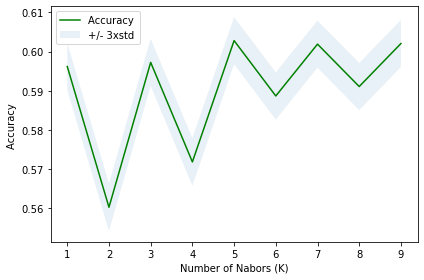

The best accuracy was with 0.6028262176788936 with k= 5


In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [31]:
print('f1 score:', f1_score(y_test, yhat, average='weighted'))
print('the jaccard_similarity_score is:', jaccard_similarity_score(y_test, yhat))

f1 score: 0.591221324273903
the jaccard_similarity_score is: 0.60207456404089


In [26]:
#desicion tree
model=DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
#Lets calculate the accuracy of the model
#lets import the library for acuracy

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
model.fit(X_train, y_train)
predictions_tree=model.predict(X_test)


print('the f1_score is:', accuracy_score(y_test, predictions_tree))
print('the jaccard_similarity_score is:', jaccard_similarity_score(y_test, predictions_tree))


Train set: (26604, 8) (26604,)
Test set: (6652, 8) (6652,)
the f1_score is: 0.591250751653638
the jaccard_similarity_score is: 0.591250751653638


In [34]:
#lets see some predictions
predictions=model.predict([[55,70,15,1,0,0,0,0], [10,15,10,0,0,0,0,1]])
predictions

array(['low_severity', 'low_severity'], dtype=object)

In [35]:
#suport vector machine

#Lineal
clflin = svm.SVC(kernel='linear')
clflin.fit(X_train, y_train) 
yhatlin = clflin.predict(X_test)
yhatlin [0:5]
#polinomial
clfpol= svm.SVC(kernel='poly')
clfpol.fit(X_train, y_train) 
yhatpol = clfpol.predict(X_test)
yhatpol [0:5]
#rbf
clfrbf = svm.SVC(kernel='rbf')
clfrbf.fit(X_train, y_train) 
yhatrbf = clfrbf.predict(X_test)
yhatrbf [0:5]
#sigmoid
clfsig= svm.SVC(kernel='sigmoid')
clfsig.fit(X_train, y_train) 
yhatsig = clfsig.predict(X_test)
yhatsig [0:5]
print('Done')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['high_severity', 'low_severity', 'high_severity', 'high_severity',
       'high_severity'], dtype=object)

In [36]:
print ("F1_score using linear:", f1_score(y_test, yhatlin, average='weighted')) 
print ("F1_score using poly:", f1_score(y_test, yhatpol, average='weighted')) 
print ("F1_score using rbf:", f1_score(y_test, yhatrbf, average='weighted')) 
print ("F1_score using sigmoid:", f1_score(y_test, yhatsig, average='weighted')) 

print('jaccard_score using poly:',jaccard_similarity_score(y_test, yhatlin))
print('jaccard_score using linear:',jaccard_similarity_score(y_test, yhatpol))
print('jaccard_score using rbf:',jaccard_similarity_score(y_test, yhatrbf))
print('jaccard_score using sigmoid:',jaccard_similarity_score(y_test, yhatsig))
print('According to both, rbf model is the best')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1_score using linear: 0.444111934579513
F1_score using poly: 0.5427978355060097
F1_score using rbf: 0.5557486840862214
F1_score using sigmoid: 0.533070029282776
jaccard_score using poly: 0.5951593505712568
jaccard_score using linear: 0.6055321707757065
jaccard_score using rbf: 0.6190619362597715
jaccard_score using sigmoid: 0.5344257366205653
According to both, rbf model is the best


In [30]:
#logistic regresion
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatreg = LR.predict(X_test)
yhatreg
yhat_prob = LR.predict_proba(X_test)
yhat_prob

Train set: (26604, 8) (26604,)
Test set: (6652, 8) (6652,)


array([[0.46988405, 0.53011595],
       [0.42891753, 0.57108247],
       [0.56033221, 0.43966779],
       ...,
       [0.49996423, 0.50003577],
       [0.31679236, 0.68320764],
       [0.48005035, 0.51994965]])

In [31]:
print ("F1_score:", f1_score(y_test, yhatreg, average='weighted'))
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))
print('jaccard_score using reg:',jaccard_similarity_score(y_test, yhatreg))


F1_score: 0.569211899122957
LogLoss: : 0.65
jaccard_score using reg: 0.6172579675285629


In [39]:
#EVALUATION MODEL
#F1 score for all models
print ("F1_score from KNN:", f1_score(y_test, yhat, average='weighted')) 
print ("F1_score from Tree:", f1_score(y_test, predictions_tree, average='weighted')) 
print ("F1_score from SVM:", f1_score(y_test, yhatrbf, average='weighted')) 
print ("F1_score from Reg:", f1_score(y_test, yhatreg, average='weighted')) 
#Jaccard score for all models
print ("jaccard from KNN:", jaccard_similarity_score(y_test, yhat)) 
print ("jccard from Tree:", jaccard_similarity_score(y_test, predictions_tree)) 
print ("jccard from SVM:", jaccard_similarity_score(y_test, yhatrbf)) 
print ("jccard from Reg:", jaccard_similarity_score(y_test, yhatreg)) 

F1_score from KNN: 0.591221324273903
F1_score from Tree: 0.5923500895076085
F1_score from SVM: 0.5557486840862214
F1_score from Reg: 0.569211899122957
jaccard from KNN: 0.60207456404089
jccard from Tree: 0.5903487672880336
jccard from SVM: 0.6190619362597715
jccard from Reg: 0.6172579675285629


In [32]:
#lets see the confusion matriz 
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhatreg))

[[ 626 2067]
 [ 479 3480]]


               precision    recall  f1-score   support

high_severity       0.57      0.23      0.33      2693
 low_severity       0.63      0.88      0.73      3959

    micro avg       0.62      0.62      0.62      6652
    macro avg       0.60      0.56      0.53      6652
 weighted avg       0.60      0.62      0.57      6652

Confusion matrix, without normalization
[[ 626 2067]
 [ 479 3480]]


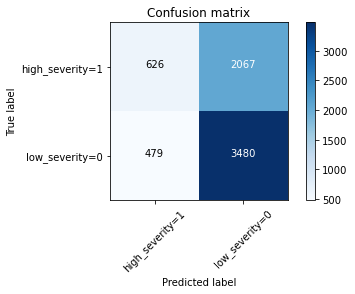

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatreg)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatreg))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high_severity=1','low_severity=0'],normalize= False,  title='Confusion matrix')